In [1]:
import os 
import pandas as pd
from numpy import*
import numpy as np
from sklearn import preprocessing

In [2]:
dir_path = os.path.dirname(os.path.realpath('__file__'))
print(dir_path)

/root


In [3]:
dataset = pd.read_csv('/media/root/WorK2/Machine-Learning-Study-Groups/Datasets/DataPreprocessing/titanic.csv')

In [4]:
dataset.head(n=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
#dataset.describe()

In [9]:
dataset.drop(['Fare',  'Name','PassengerId'], axis=1, inplace=True)

In [10]:
#dataset.head(n=15)

In [11]:
dataset['Age'] = dataset['Age'].fillna(0)

In [12]:
new_sex = []
for i in dataset['Sex']:
    if i == 'male':
        new_sex.append(0)
    else:
        new_sex.append(1)

In [13]:
dataset['Sex'] = new_sex


In [14]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    from sklearn.preprocessing import StandardScaler

    enc = preprocessing.LabelEncoder()
    enc_cat_features = enc.fit_transform(cat_features)
    
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit_transform(enc_cat_features.reshape(-1,1))
    return enc_cat_features.reshape(-1,1)

        

In [15]:
new_emp = []
for i in dataset['Embarked']:
    if i == 'S':
        new_emp.append(0)
    elif i=='C':
        new_emp.append(1)
    else :
        new_emp.append(2)
dataset['Embarked']=new_emp
tic=encode_string(dataset['Ticket'])
dataset['Ticket']=tic
dataset['Cabin'] = dataset['Cabin'].fillna('0')  
tic=encode_string(dataset['Cabin'])
dataset['Cabin']=tic
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,0,22.0,1,0,523,0,0
1,1,1,1,38.0,1,0,596,82,1
2,1,3,1,26.0,0,0,669,0,0
3,1,1,1,35.0,1,0,49,56,0
4,0,3,0,35.0,0,0,472,0,0


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

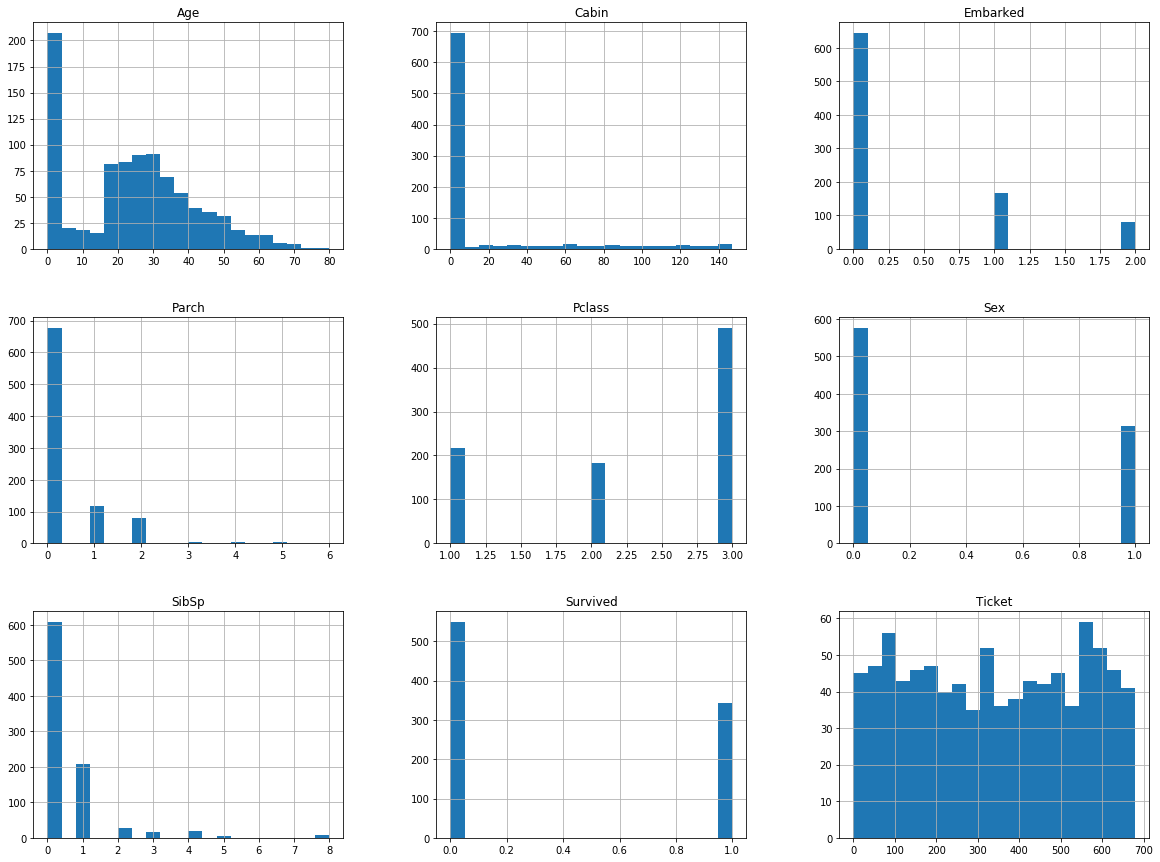

In [17]:
dataset.hist(bins=20, figsize=(20,15))
plt.show()

In [18]:
Feature_names = ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch','Ticket','Cabin','Embarked'] ##numerical features
Features = array(dataset[Feature_names])
Labels = array(dataset['Survived'])
print(len(Features), len(Labels))

891 891


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2)
print(len(x_train), len(x_test))

712 179


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Build Model From scratch

In [21]:
alpha = 0.0001
ones = np.ones([x_train.shape[0],1])
X = np.concatenate((ones,x_train),axis=1)
Y = y_train
theta = np.ones(X.shape[1]).T
m=len(X)
xt=X.transpose()
print(X.shape, Y.shape, theta.shape)

(712, 9) (712,) (9,)


In [22]:
def classilearn(it,theta):
    for i in range(it) :
        theta=theta - (alpha/m)*xt.dot((X.dot(theta)-Y))
    return theta

In [23]:
classilearn(100000,theta)

array([ 0.38345494, -0.09178454, -0.03469357,  0.24845551, -0.03926991,
       -0.00969258, -0.03060159,  0.06212502,  0.01958141])

# with Decision tree classifier

In [24]:
from sklearn import tree

In [25]:
dtc_clf = tree.DecisionTreeClassifier()
dtc_clf = dtc_clf.fit(x_train,Y)
dtc_prediction = dtc_clf.predict(x_test)
print (dtc_prediction)

[0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0]


# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

/root/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
#RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(x_train,Y)
rfc_prediction = rfc_clf.predict(x_test)
print (rfc_prediction)

[0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0]


# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
#LogisticRegression
l_clf = LogisticRegression()
l_clf.fit(x_train,Y)
l_prediction = l_clf.predict(x_test)
print (l_prediction)

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0
 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0]


# SVC (Support Vector Classifier)

In [30]:
from sklearn.svm import SVC

In [31]:
#Support Vector Classifier
s_clf = SVC()
s_clf.fit(x_train,Y)
s_prediction = s_clf.predict(x_test)
print (s_prediction)

[0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0
 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0]


## accuracy_score

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
#accuracy scores
dtc_tree_acc = accuracy_score(dtc_prediction,y_test)
dtc_tree_acc = accuracy_score(rfc_prediction,y_test)
l_acc = accuracy_score(l_prediction,y_test)
s_acc = accuracy_score(s_prediction,y_test)
print(dtc_tree_acc,dtc_tree_acc,l_acc,s_acc)

0.7430167597765364 0.7430167597765364 0.7932960893854749 0.770949720670391
